# What is PyTorch?

PyTorch is a Python library that facilitates building deep learning projects. It allows deep learning models to be expressed in idiomatic Python. As Python does for programming, PyTorch provides an excellent introduction to deep learning.  
By working with **tensors**, PyTorch allows to design and implement neural network architectures, train models, and deploy them to production. Tensors are very similar to Numpy arrays. They are also multidimensional arrays in their core. 

Deep learning gives power to solve the problems that were previously impossible to solve.  
Learning one framework makes it easier to transfer concepts to others. So, switching from PyTorch to JAX or a similar framework should be straightforward.

The most of PyTorch is written in C++ and CUDA. Python API is is where PyTorch shines in terms of usability and integration with wider Python ecosystem.

## Why PyTorch?

PyTorch is easy to recommend because of its simplicity. It is easy to learn, extend, and debug. The second key aspect is that it it provides accelerated compute: you can use GPUs, TPUs, and many more. For example - on Apple Silicon - [PyTorch uses the new Metal Performance Shaders (MPS) backend](https://developer.apple.com/metal/pytorch/) for GPU acceleration.

In [7]:
!system_profiler SPDisplaysDataType

Graphics/Displays:

    Apple M4 Pro:

      Chipset Model: Apple M4 Pro
      Type: GPU
      Bus: Built-In
      Total Number of Cores: 16
      Vendor: Apple (0x106b)
      Metal Support: Metal 4
      Displays:
        Color LCD:
          Display Type: Built-in Liquid Retina XDR Display
          Resolution: 3024 x 1964 Retina
          Main Display: Yes
          Mirror: Off
          Online: Yes
          Automatically Adjust Brightness: Yes
          Connection Type: Internal



In [2]:
import torch

In [8]:
torch.backends.mps.is_available()

True

In [10]:
t = torch.ones([2, 3], device='mps:0')
print(t)

tensor([[1., 1., 1.],
        [1., 1., 1.]], device='mps:0')


## Alternatives

Arguably, PyTorch offers one of the most seamless translations of ideas into a Python code in the deep learning landscape. It has the highest citations count at international conferences.

Among industry professionals, there's been a rise in the use of various HuggingFace libraries for Core ML, training, and optimization: https://huggingface.co/docs. These practitioners typically work with higher levels of abstraction, for example models and SFT trainers. While PyTorch can achieve the same results, using HuggingFace libraries is often less mentally taxing due to the higher-level abstractions they provide.

Also, since LLMs are a hot topic these days and are often too large to run on a single GPU, some frameworks are specifically designed to handle these tasks. One of the most popular is https://unsloth.ai/ (written in a combination of [Triton](https://triton-lang.org/) for kernels and PyTorch).

Another great library is [JAX](https://jax.dev). While it’s not positioned as a deep learning framework, JAX is designed for high-performance array computing. I can't help but notice how similar it is to PyTorch API. However, it focuses on distilling the core mathematical concepts behind deep learning—such as efficient matrix multiplication and optimization of differentiable functions—into the core library. All other abstractions, even something as basic as a neural network layer, are handled by JAX-based libraries. It’s a very interesting approach—almost the opposite of what HuggingFace is doing.  
JAX has started gaining traction as a NumPy equivalent with GPU, automatic differentiation, and Just-In-Time (JIT: you write regular Python/NumPy-style code, and JIT compiles it into optimized machine code for your target accelerator (GPU/TPU) via XLA) compilation.

XLA (Accelerated Linear Algebra) is an open source compiler for machine learning. The XLA compiler takes models from popular frameworks such as PyTorch, TensorFlow, and JAX, and optimizes the models for high-performance execution across different hardware platforms including GPUs, CPUs, and ML accelerators.

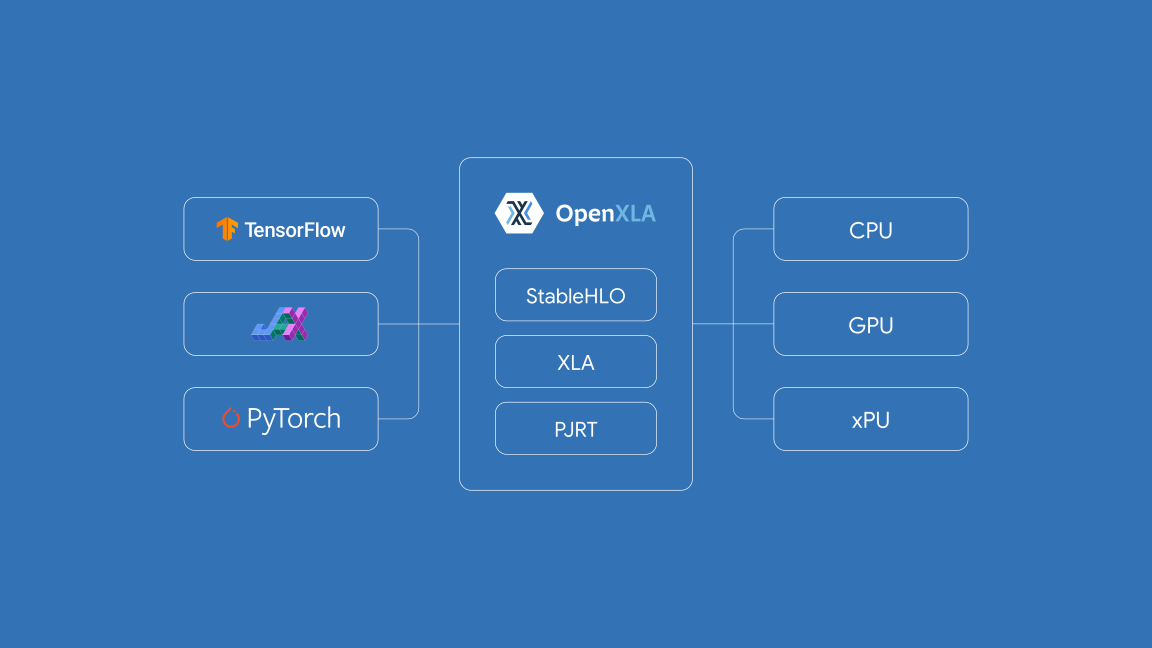

## PyTorch Components

- **Tensors** (multidimensional arrays). At its core PyTorch is a library that provides multidimensional arrays (tensors). Almost everything else is an extensive library to of operations on them.
- **[Autograd](https://docs.pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)**. Tensors remember what numerical operations are done on them, creating history of these operations. PyTorch can calculate how the final model output changes if we modify any the initial data. Automatic differentiation engine, autograd, handles these calculation for us behind the scene.

↑↑↑ Tensors and Autograd are two fundamental building blocks, with everything else built on top of them. For example, JAX doesn't include as many built-in components as PyTorch and instead relies more on external libraries to achieve similar results.

- **torch.nn** contains common neural network layers and other architectural components like activation functions, loss functions, etc.
- **torch.utils.data**. We train a model on some data. But first, we need to load the data from somewhere, transform it into tensors, and store in a container we call a `Dataset`. `DataLoader` knows how to work with data sources and knows how to convert other data representations into datasets. DataLoaders often allow to load data in parallel. 
- **Optimizer**. At each step in the training loop, we evaluate our model on the samples we got from the data loader. We then compare the outputs of our model to the desired output (the targets) using some loss function. After we have compared our actual outputs to the ideal with the loss functions, we need to push the model a little to move its outputs to better resemble the target. This is where the PyTorch autograd engine comes in; but we also need an optimizer doing the updates, and that is what PyTorch offers us in `torch.optim`.

PyTorch continues to evolve, regularly incorporating new components to meet current demands. For example, training on multiple GPUs is a must these days, hence it has `torch.distributed` submodule. PyTorch even has a `torch.onnx` module for exporting models into common formats like [ONNX](https://onnx.ai/)

PyTorch also addresses the challenge of model deployment. While it supports exporting models to ONNX, if you're fine with keeping PyTorch and Python as dependencies, you can use `torch.compile()`. This function leverages a JIT (Just-In-Time) compiler—so the first run will be slower due to the compilation process, but subsequent runs with the same input shapes will be significantly faster. On transformer architectures, this typically results in a 1.3x to 2x speedup without any code changes.

In contrast, JIT compilation plays such a central role in JAX that it treats **functional transformations** like `jit` and `vmap` as first-class primitives. This highlights a key architectural difference between JAX and PyTorch.

# What is Deep Learning & Artificial Intelligence?

The term *artificial intelligence* refers to computer systems that can performs tasks typically requiring human intelligence.  
There's a lot of debate about what exactly *artificial intelligence* means. I prefer to think about Artificial Intelligence as a class of algorithms that are able to approximate complicated, non-linear processes very-very efficiently; which we can use to automate tasks that were previously limited to humans.

Probably the most impressive feature of **deep learning** is that models learn abilities **from examples** rather than being programmed with a set of rules by humans. This has sparked many debates about the connection between self-awareness and the ability to perform cognitive tasks. We used to believe that self-awareness was a prerequisite for such tasks, especially language. However, recent developments in LLMs have proven us wrong.

We might not even have the right vocabulary to describe what’s happening inside deep neural networks when they display intelligent behavior, such as generating language or recognizing images. Some argue that we’re asking the wrong question altogether. Edsger W. Dijkstra once said that wondering whether machines can think is “about as relevant as the question of whether submarines can swim.”

Deep Learning is a subcategory of Artificial Intelligence. In deep learning we train mathematical entities we call *deep neural networks* by presenting instructive examples. Deep learning uses large amounts of data to approximate complex functions. You can think of a deep neural network (with three or more layers) as a function that maps a wide range of inputs to a wide range of outputs: text→image, text→voice, image→label etc. are all valid mappings.

# On Defining of Artificial Intelligence

[Special Issue "On Defining Artificial Intelligence"](https://reference-global.com/article/10.2478/jagi-2020-0003) features articles on the definition of Artificial Intelligence by several authors I follow and admire, including Joscha Bach, François Chollet, and Richard S. Sutton.



I personally relate to the definition Pei Wang provided in one of his papers:

*The essence of intelligence is the principal of adapting to the environment while working with insufficient knowledge and resource. Accordingly, an intelligence system should rely on finite processing capacity, work in real time, open to unexpected task, and learn from experience.*

I am not alone. It is more than a half respondents of "Journal of Artificial General Intelligence" agree or strongly agree with this definition. There are two aspects of this definition that make it especially appealing to me:

1. We humans are used to working with incomplete information and are comfortable doing so. Historically, however, we provided computer programs with complete information, which is why we didn’t consider them intelligent.
2. We also operate under time constraints and can't include every possible task in a training set. Instead, we approximate and adapt. Despite limited resources, humans are remarkably successful at adapting in contrast to classical computer programs.

I’ve never really thought about “learning from experience” as a missing piece, but a recent article by two researchers I deeply admire—David Silver and Richard S. Sutton— ["Welcome to the Era of Experience"](https://storage.googleapis.com/deepmind-media/Era-of-Experience%20/The%20Era%20of%20Experience%20Paper.pdf) changed my perspective. It made me realize that continuous learning is not just important, but a crucial component of progress.

# Machine Learning → Deep Learning

Until the last decade, machine learning relied heavily on *feature engineering*. Even back when I was a college student in the early 2010s, we were taught how to build expert systems. It wasn’t until I started my master’s program that we even touched on a simple perceptron.

Feature engineering leverages domain expertise to create new features from raw data. In contrast, deep learning works directly with raw data and automatically learns useful representations to perform a task. This reduces the need for extensive manual feature engineering. However, it doesn't eliminate the need for experts - it simply means that neural networks are allowed to discover and learn representations on their own, rather than having them manually crafted.

During training, we use a **loss function** - a real-valued function that compares the model's outputs to the reference data. This value indicates the difference between the model's predictions and the desired results. From the perspective of the loss function, training involves minimizing this value. However, it's important to avoid overfitting, which can reduce the model's ability to generalize to data outside the training set.

One way to understand a neural network is as a function approximator - a system that maps inputs to outputs, not exactly, but approximately. Because it's an approximation, it's reasonable to conclude that there can be multiple internal implementations that achieve the same target function approximation. This helps explain why different model architectures can solve the same or similar types of problems. While we preserve properties of a mapping function - we are good.